In [149]:
#importing libraries
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
#fetching major nifty companies data
nifty = yf.download(['SUNPHARMA.NS','DRREDDY.NS','CIPLA.NS','DIVISLAB.NS','LUPIN.NS'])

[*********************100%***********************]  5 of 5 completed


In [82]:
#Cleaning the nifty pharma data
nifty_pharma = pd.read_csv(r"C:\Users\jubin\OneDrive\Desktop\Analytics EXPO\Competitors Analysis\Data\NIFTY PHARMA_Data - Analytics.csv")
nifty_pharma.index = pd.to_datetime(nifty_pharma.Date)
nifty_pharma = nifty_pharma.sort_index(ascending=True)
nifty_pharma.rename(columns={'Close':'Nifty_Pharma'},inplace=True)
nifty_pharma.drop(columns='Date',inplace=True)

In [83]:
#taking the nifty all closes data and saving it
nifty_all = pd.concat([nifty.Close,nifty_pharma],axis=1)
nifty_all.dropna().loc['2008-01-01':'2023'].to_csv(r"C:\Users\jubin\OneDrive\Desktop\Analytics EXPO\Competitors Analysis\Final_Closing.csv")

## Competitors Analyis

### Heatmap

Text(0.5, 1.03, 'Heatmap : NIfty Pharma and Its Major Constituents')

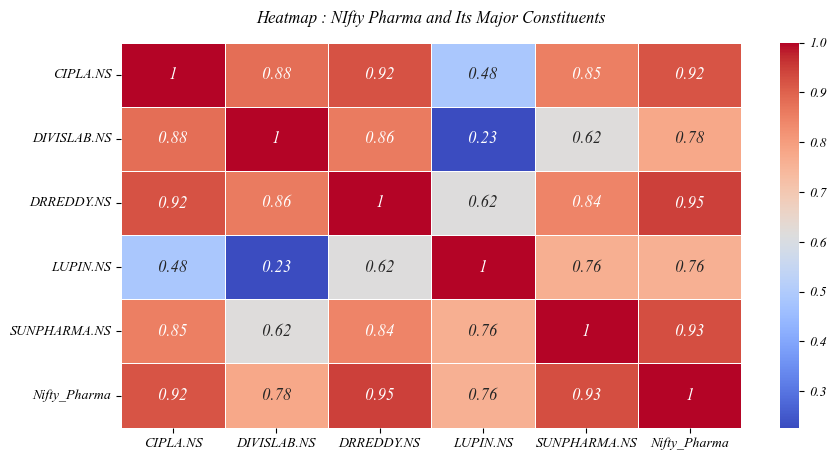

In [84]:
#plotting the correlation values
import seaborn as sns
import matplotlib.pyplot as plt
req_nifty_pharm = nifty_all.dropna().loc['2008-01-01':'2023']
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.family'] = 'Times New Roman'
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(req_nifty_pharm.corr(),annot=True,cmap='coolwarm', linewidths=.5, annot_kws={"size": 12},
            ax=ax).set_title('Heatmap : NIfty Pharma and Its Major Constituents',y=1.03)

### Relative Growthplot

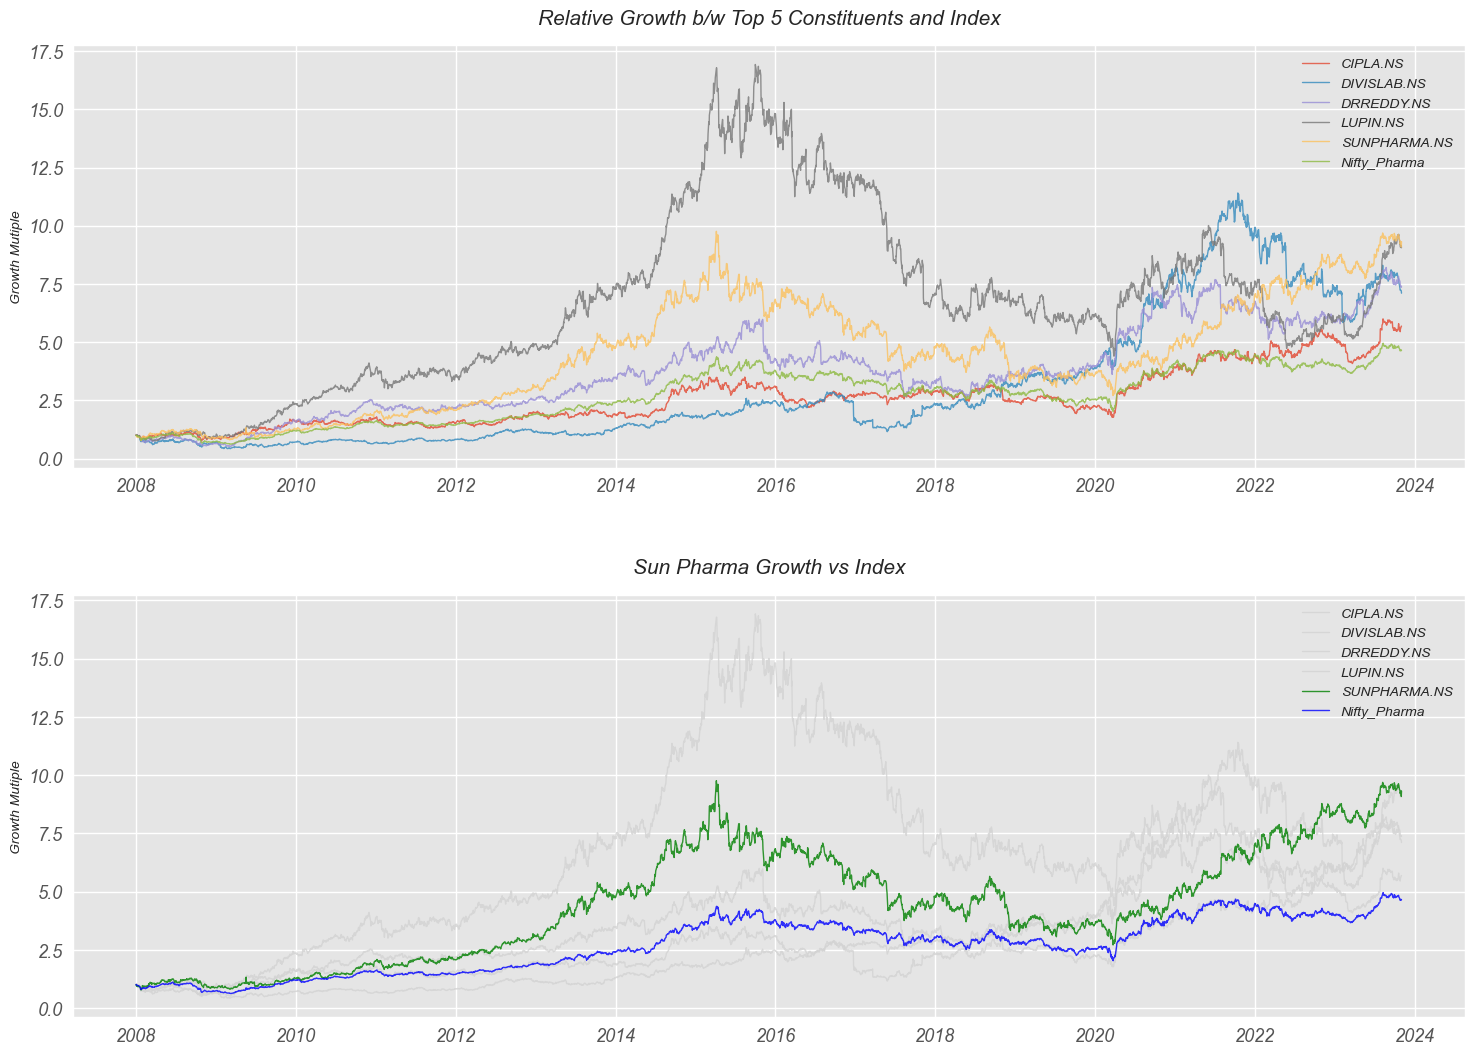

In [186]:
fig,ax = plt.subplots(2,1,figsize=(16,12))
#relative growth among competitors and the index
plt.style.use('ggplot')  # or 'Solarize_Dark2'
ax[0].plot(req_nifty_pharm.div(req_nifty_pharm.iloc[0]),alpha=.8)
ax[0].set_ylabel('Growth Mutiple')
ax[0].set_title('Relative Growth b/w Top 5 Constituents and Index',y=1.03,fontsize=15)
# Decrease line width for all lines
for line in ax[0].lines:
    line.set_linewidth(1)  # Set to your desired line width    
# Add a legend
ax[0].legend(labels=req_nifty_pharm.columns)
ax[0].tick_params(labelsize=13)
#plot 2 with the highlihghted lines    
ax[1].plot(req_nifty_pharm.div(req_nifty_pharm.iloc[0]),alpha=.8)
ax[1].set_title('Sun Pharma Growth vs Index',y=1.03,fontsize=15)
ax[1].set_ylabel('Growth Mutiple')
ax[1].tick_params(labelsize=13)
# Decrease line width for all lines
for line in ax[1].lines:
    line.set_linewidth(1)  # Set to your desired line width
# Highlight Line 1 and Line 2 with different colors
for line in ax[1].lines:
    if line.get_label() in ['_child4']:
        line.set_color('green')  # Highlighted color
    elif line.get_label() in ['_child5']:
        line.set_color('blue')
    else:
        line.set_color('lightgray')  # Grayed-out color

# Add a legend
ax[1].legend(labels=req_nifty_pharm.columns)
# Show the plot
plt.subplots_adjust(hspace=0.3) 
plt.show()


### Rsk Return Analysis 

In [ ]:
#computing the risk and return of the companies above
daily_ret  = req_nifty_pharm.pct_change().dropna()
risk_ret = daily_ret.agg(['mean','std']).T
annual_risk_ret = pd.DataFrame()
annual_risk_ret['mean'] = risk_ret['mean'] * 252
annual_risk_ret['std'] = risk_ret['std'] * np.sqrt(252)
risk_ret_= annual_risk_ret.rename(columns={'mean':'Annual Return','std':'Annual Risk'})
risk_ret_ = risk_ret_* 100

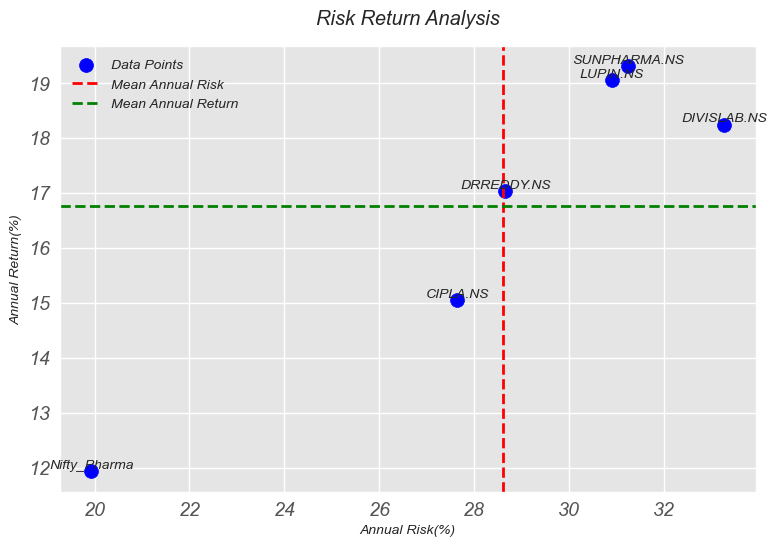

In [207]:
# Create a scatter plot
plt.scatter(risk_ret_['Annual Risk'],risk_ret_['Annual Return'], c='blue', s=100, label='Data Points')
labels = risk_ret_.index
mean_x = np.mean(risk_ret_['Annual Risk'])
mean_y = np.mean(risk_ret_['Annual Return'])

# Add labels for data points
for i, label in enumerate(labels):
    plt.annotate(label, (risk_ret_['Annual Risk'][i],risk_ret_['Annual Return'][i]), fontsize=10, ha='center', va='bottom')
# Add mean lines (horizontal and vertical)
plt.axvline(mean_x, color='red', linestyle='--', label='Mean Annual Risk', linewidth=2)
plt.axhline(mean_y, color='green', linestyle='--', label='Mean Annual Return', linewidth=2)
# Add a legend
plt.legend()
# Set axis labels and title
plt.xlabel('Annual Risk(%)')
plt.ylabel('Annual Return(%)')
plt.title('Risk Return Analysis',y=1.03)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

 ### Index Composition

In [43]:
#extracting weightage of companies in the sectoral indice
dat = pd.read_excel(r"C:\Users\jubin\OneDrive\Desktop\Analytics EXPO\Competitors Analysis\Weightage Nifty Pharma.xlsx")
dat.loc[len(dat.index)] = ['Glenmark Pharmaceuticals Ltd.',2.48]
rest_wgt = (100-sum(dat['Weight(%)']))
dat.loc[len(dat.index)] = ['Rest',rest_wgt]
dat.to_csv(r"C:\Users\jubin\OneDrive\Desktop\Analytics EXPO\Competitors Analysis\Final_Weightage.csv")

Text(0.5, 1.0, 'Market Weight(%) of Nifty Pharma Constituents')

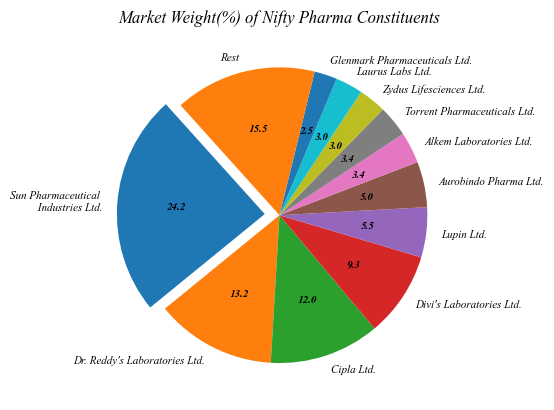

In [143]:
#Weights of market cap in the nifty pharma index
dat.iloc[0,0] = 'Sun Pharmaceutical \n Industries Ltd.'
ex = []
for x in dat.index:
    ex.append(0)
ex[0] = 0.1
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.family'] = 'Times New Roman'
fig, ax = plt.subplots()
wedges, texts, autotexts = plt.pie(dat['Weight(%)'],autopct='%.1f',textprops={'fontsize':8},
    labeldistance=1.1,startangle=132,labels=dat['Company’s Name'],explode=ex)
# Bold the percentage values
for autotext in autotexts:
    autotext.set(fontweight='bold')
plt.title('Market Weight(%) of Nifty Pharma Constituents',)